## Get bounding boxes from parking lot images using YOLOv8n

In [36]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n model

### Load image data summary

In [37]:
#Load file_names_dataframe from CSV
import pandas as pd
df = pd.read_csv('file_names_dataframe.csv')
display(df.head())

,parking_lot,weather,date,file_path
0,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
1,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
2,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
3,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...
4,UFPR04,Cloudy,2012-12-29,/Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML...


## Visualize different locations

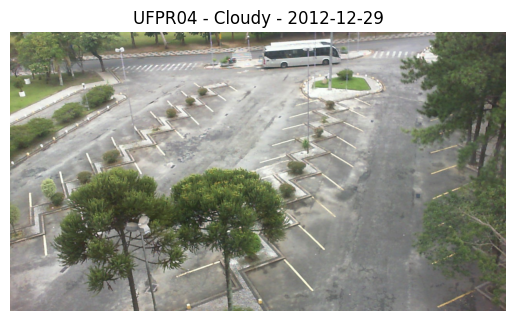

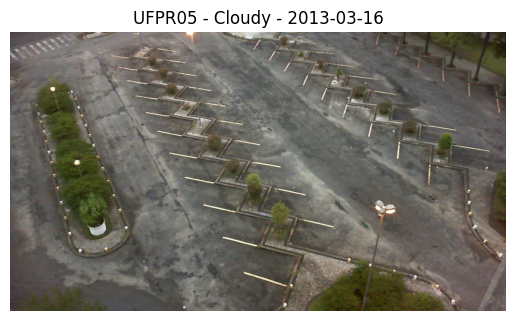

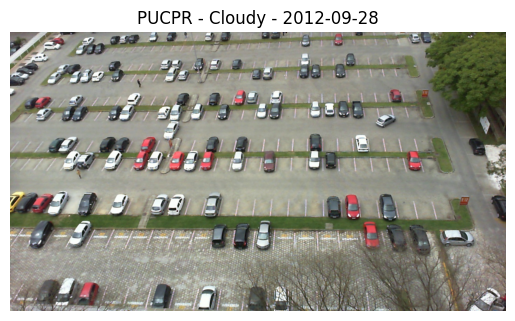

In [17]:
from PIL import Image

# Print one image from each unique parking_lot in the dataframe
import matplotlib.pyplot as plt

for lot in df['parking_lot'].unique():
    row = df[df['parking_lot'] == lot].iloc[0]
    image_path = row['file_path']
    img = Image.open(image_path)
    plt.figure()
    plt.title(f"{lot} - {row['weather']} - {row['date']}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Sample YOLO inference on one image


image 1/1 /Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML/UFPR04/Cloudy/2012-12-29/2012-12-29_11_35_34.jpg: 384x640 1 car, 38.0ms
Speed: 1.7ms preprocess, 38.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
image 1/1 /Volumes/SSD_1/parking-lot/PKLotYoloData/NoXML/UFPR04/Cloudy/2012-12-29/2012-12-29_11_35_34.jpg: 384x640 1 car, 38.0ms
Speed: 1.7ms preprocess, 38.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


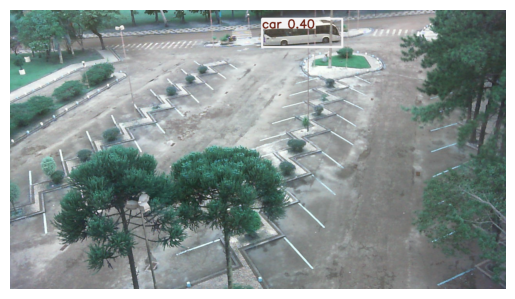

In [16]:
# Display the image with bounding boxes in the notebook cell output
from PIL import Image
import matplotlib.pyplot as plt

if not df.empty:
    first_image_path = df.iloc[0]['file_path']
    result = model(first_image_path)[0] #YOLO returns a list even with one image
    img_with_boxes = result.plot()

    # Display the image using matplotlib
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.show()